#  Milk data analysis and Clustering the Customers


### Customer segmentation is important for businesses to understand their target audience. Different advertisements can be curated and sent to different audience segments based on their demographic profile, interests, and affluence level.

## Context

Distributors use our sales force automation tools in order to help them track their sales, improve their operations and increase their top line.

We would like to help these distributors maximize their profits by allowing them to identify which merchants they should target.

The specific distributor that we will be analysing is Cow and Buffalo Milk company. They produce dairy products for the entire country. Below is a list of merchants that they service along with meta data that could be useful in determining which of the merchants they should invest resources in.

## Problem

1. **Make use of the merchant data set below in order to develop models that will help Cow and Buffalo Milk company target the right customers. The goal is to help Cow and Buffalo Milk company not only increase sales but also to become more efficient in allocating advertising spend.**
2. **Given the payment history that the merchant has and the cities that the merchant operates in, create a credit scoring algorithm that will help the distributor figure out which are the most creditworthy merchants and which ones are not.**

## Dataset features

**The dataset has the following features:**

- **Merchant Id** - This is the unique Identification number that is given to a merchant
- **Annual Revenue** - This is the annual income of the merchant
- **Spending score** - It is the score(out of 100) given to a merchant by Ramani.io, based on the money spent on distributor products and the behavior of the customer.
- **City** - The city that the merchant is located in
- **Most Purchased Product** - In terms of money spent on a particular product, this is the most popular product for that specific merchant. Therefore, this is the most purchased product by that merchant from Cow and Buffalo Milk company.
- **Payment score -** It is the score(out of 5) given to a merchant by a Counsultant, based on the ability for the merchant to repay inventory that is purchased on credit. A score of 5 is great , a score of 1 is poor.

## Constraints

- Language: Python,R, Scala
- Frameworks/libraries: Tensorflow, Keras, Apache Spark, pandas, numpy, matplotlib, sklearn


## Submission

When you have completed the project, please upload the code to a repository of your choice and share the clone link with **me**

The submission should include a section on how to run the code as well as a write up on what you discovered and how you would  you advise Cow and Buffalo Milk company on which merchants to target.




In [1]:
# importing the required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", size=14)


In [2]:
# read the csv and print the first 5 rows
df = pd.read_excel("data.xlsx")
df.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [3]:
df.rename(columns={'Genre':'Gender',
                   'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Most Purchased Product': 'Most_Purchased_Product'
                  }, 
                   inplace=True
          )

In [4]:
df.describe()

,Merchant Id,Annual_Revenue,Spending_Score,Repayment Score 1-5
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,3.990000
std,57.879185,26.264721,25.823522,0.850598
min,1.000000,15.000000,1.000000,1.000000
25%,50.750000,41.500000,34.750000,4.000000
50%,100.500000,61.500000,50.000000,4.000000
75%,150.250000,78.000000,73.000000,5.000000
max,200.000000,137.000000,99.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [6]:
df['City'].value_counts()

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

In [7]:
df['Most_Purchased_Product'].value_counts()

Mtindi 250ml        82
Fresh Milk 1ltr     76
Fresh Milk 250ml    21
Mtindi 500ml        21
Name: Most_Purchased_Product, dtype: int64

In [8]:
#Looking for null values
df.isna().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
dtype: int64

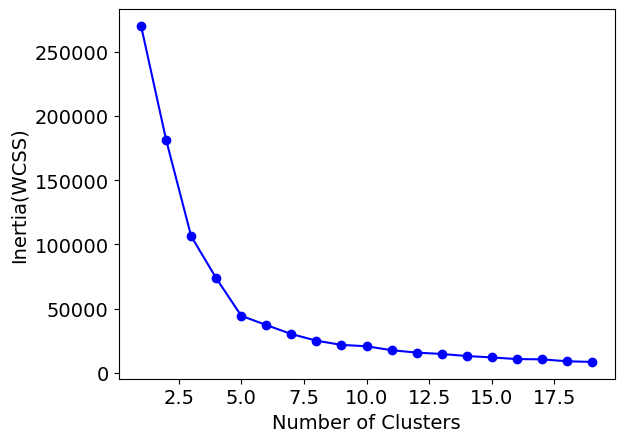

In [5]:
#Creating values for the elbow
X = df.loc[:,["Annual_Revenue", "Spending_Score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia(WCSS)')
plt.show()


In [6]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
labels = means_k.labels_
centroids = kmeans.cluster_centers_


In [7]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [15]:
len(y_kmeans)

200

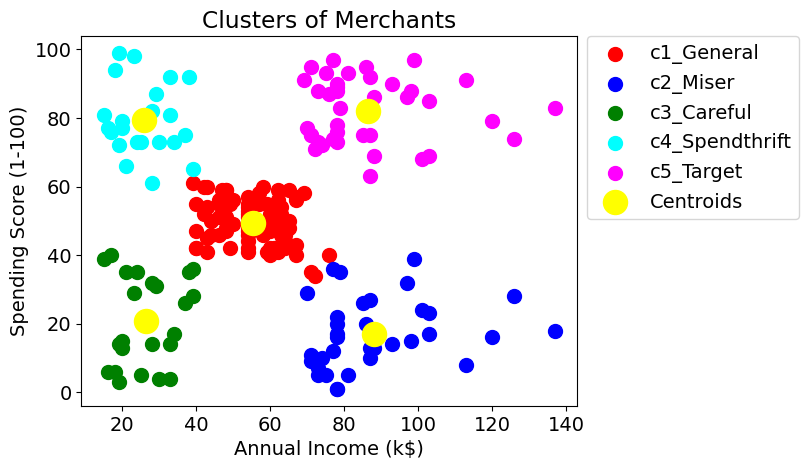

In [14]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual_Revenue'], X[y_kmeans == 0]['Spending_Score'], s = 100, c = 'red', label = 'c1_General')
plt.scatter(X[y_kmeans == 1]['Annual_Revenue'], X[y_kmeans == 1]['Spending_Score'], s = 100, c = 'blue', label = 'c2_Miser')
plt.scatter(X[y_kmeans == 2]['Annual_Revenue'], X[y_kmeans == 2]['Spending_Score'], s = 100, c = 'green', label = 'c3_Careful')
plt.scatter(X[y_kmeans == 3]['Annual_Revenue'], X[y_kmeans == 3]['Spending_Score'], s = 100, c = 'cyan', label = 'c4_Spendthrift')
plt.scatter(X[y_kmeans == 4]['Annual_Revenue'], X[y_kmeans == 4]['Spending_Score'], s = 100, c = 'magenta', label = 'c5_Target')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [16]:
df.loc[:,"Cluster_Number"] = y_kmeans

In [18]:
Cluster_Nature = []

for row in df['Cluster_Number']:
    if row == 0: 
        Cluster_Nature.append('General')
    elif row == 1: 
        Cluster_Nature.append('Miser') # Miser is the one who hoards wealth and spends a little money
    elif row == 2: Cluster_Nature.append('Careful')
    elif row == 3: Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
    elif row == 4:  Cluster_Nature.append('Target')
    else: Cluster_Nature.append('Outlier')

df['Cluster_Nature'] = Cluster_Nature


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment Score 1-5     200 non-null    int64 
 6   Cluster_Number          200 non-null    int32 
 7   Cluster_Nature          200 non-null    object
dtypes: int32(1), int64(4), object(3)
memory usage: 11.8+ KB


In [20]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment Score 1-5,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Careful


In [21]:
df['Cluster_Nature'].value_counts()

General        81
Target         39
Miser          35
Careful        23
Spendthrift    22
Name: Cluster_Nature, dtype: int64

In [22]:
uniqueValues = df['Cluster_Nature'].unique()
print(uniqueValues)

['Careful' 'Spendthrift' 'General' 'Target' 'Miser']


In [23]:
target_df = df.loc[df['Cluster_Nature'] == 'Target']

In [24]:
target_df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Cluster_Number,Cluster_Nature
123,124,69,91,Dar es Salaam,Mtindi 250ml,4,Target
125,126,70,77,Dar es Salaam,Mtindi 250ml,4,Target
127,128,71,95,Dar es Salaam,Mtindi 250ml,4,Target
129,130,71,75,Dar es Salaam,Mtindi 250ml,4,Target
131,132,71,75,Dar es Salaam,Mtindi 250ml,4,Target


<AxesSubplot:>

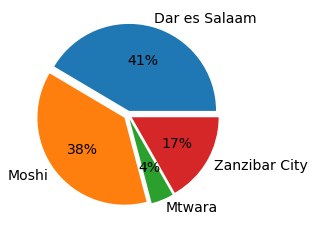

In [36]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
  
# Plotting the pie chart for above dataframe
df.groupby(['City']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

<AxesSubplot:>

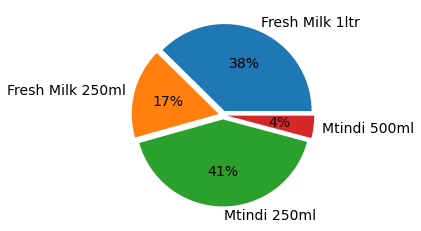

In [35]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
  
# Plotting the pie chart for above dataframe
df.groupby(['Most_Purchased_Product']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False, ylabel='')

Cluster_Nature  Careful  General  Miser  Spendthrift  Target
City                                                        
Dar es Salaam         0        8     35            0      39
Moshi                 2       73      0            1       0
Mtwara               21        0      0            0       0
Zanzibar City         0        0      0           21       0


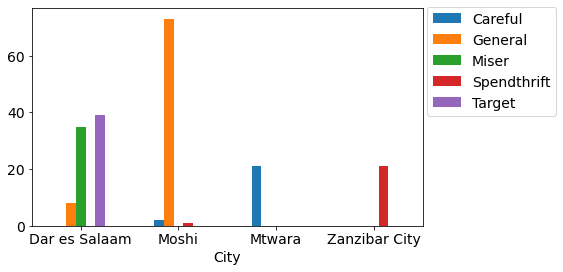

In [26]:

# Cross tabulation between City and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['City'],columns=df['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.legend(bbox_to_anchor=(1.36, 1.04))

Cluster_Nature          Careful  General  Miser  Spendthrift  Target
Most_Purchased_Product                                              
Fresh Milk 1ltr               2       73      0            1       0
Fresh Milk 250ml              0        0      0           21       0
Mtindi 250ml                  0        8     35            0      39
Mtindi 500ml                 21        0      0            0       0


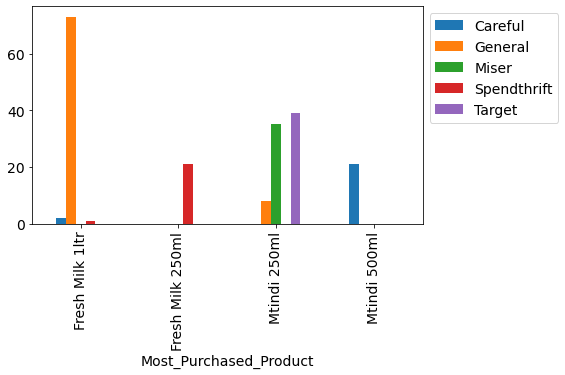

In [27]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['Most_Purchased_Product'],columns=df['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

City                    Dar es Salaam  Moshi  Mtwara  Zanzibar City
Most_Purchased_Product                                             
Fresh Milk 1ltr                     0     76       0              0
Fresh Milk 250ml                    0      0       0             21
Mtindi 250ml                       82      0       0              0
Mtindi 500ml                        0      0      21              0


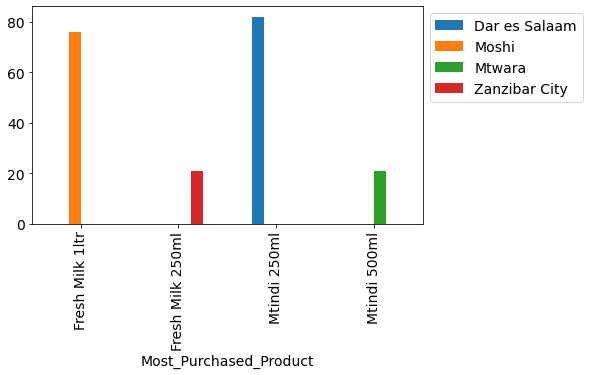

In [28]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['Most_Purchased_Product'],columns=df['City'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

                              Annual_Revenue
City          Cluster_Nature                
Dar es Salaam General              69.500000
              Miser                88.200000
              Target               86.538462
Moshi         Careful              39.000000
              General              53.739726
              Spendthrift          39.000000
Mtwara        Careful              25.095238
Zanzibar City Spendthrift          25.095238


<AxesSubplot:xlabel='City,Cluster_Nature'>

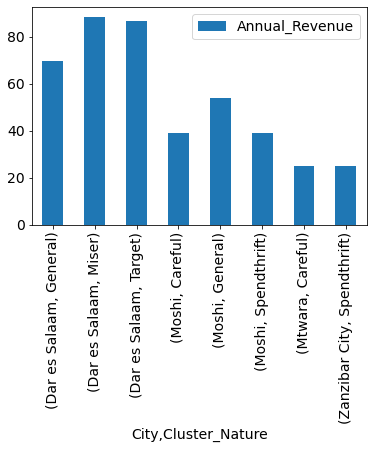

In [29]:
#Pivoit Table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(df,index=['City','Cluster_Nature'],aggfunc={'Annual_Revenue':np.mean}) #,'Most_Purchased_Product':np.sum
print(table)
table.plot(kind='bar')